**Coursebook: SQL and Data Visualization with Pandas**
- Part 4 of Data Analytics Specialization
- Course Length: 12 hours
- Last Updated: April 2019
___

- Author: [Samuel Chan](https://github.com/onlyphantom)
- Developed by [Algoritma](https://algorit.ma)'s product division and instructors team

# Background

## Top-Down Approach 

The coursebook is part 4 of the **Data Analytics Specialization** offered by [Algoritma](https://algorit.ma). It takes a more accessible approach compared to Algoritma's core educational products, by getting participants to overcome the "how" barrier first, rather than a detailed breakdown of the "why". 

This translates to an overall easier learning curve, one where the reader is prompted to write short snippets of code in frequent intervals, before being offered an explanation on the underlying theoretical frameworks. Instead of mastering the syntactic design of the Python programming language, then moving into data structures, and then the `pandas` library, and then the mathematical details in an imputation algorithm, and its code implementation; we would do the opposite: Implement the imputation, then a succinct explanation of why it works and applicational considerations (what to look out for, what are assumptions it made, when _not_ to use it etc).

## Learn-by-Building

This coursebook is intended for participants who have completed the preceding courses offered in the **Data Analytics Developer Specialization**. This is the third course, **SQL and Data Visualization with Pandas**.

The coursebook focuses on:
- Working with Visualization
- Pandas and Matplotlib
- Querying from SQL Databases
- Database Joins

At the end of this course is a Graded Asssignment section, where you are expected to apply all that you've learned on a new dataset, and attempt the given questions.

# Data Visualization
## Matplotlib

Python developers familiar with `matplotlib` may be tempted to think that as we've learned to:
    - Read the data in (Part 1)
    - Inspect the data (Part 1)
    - Perform EDA (Part 2)
    - Clean and Transform the data (Part 2)
    - Reshape and aggregate the data (Part 3)
  
Surely this is the point where a data analyst whip up some flashy charts using the popular `matplotlib` library? 

Well - yes. Even better, we're going to use the `DataFrame.plot()` method, built-into `pandas` which in turn calls `matplotlib` plotting functions under-the-hood. Notice that we added `matplotlib.pyplot` as an import, even though our code will not explicitly call `matplotlib` but rely on `pandas` implementation.

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
stock = pd.read_pickle('data_cache/stock')
fb = stock.xs('FB',axis=1, level=1)
fb.head()

Attributes,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,181.580002,177.550003,177.679993,181.419998,18151900.0,181.419998
2018-01-03,184.779999,181.330002,181.880005,184.669998,16886600.0,184.669998
2018-01-04,186.210007,184.100006,184.899994,184.330002,13880900.0,184.330002
2018-01-05,186.899994,184.929993,185.589996,186.850006,13574500.0,186.850006
2018-01-08,188.899994,186.330002,187.199997,188.279999,17994700.0,188.279999


The best way to demonstrate the efficiency gains of `DataFrame.plot()` is to see it in action. We will call `.plot()` directly on our `DataFrame` - `pandas` take care of the  matplotlib code that, [by matplotlib's own admission](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py), _can be daunting to many new users_.

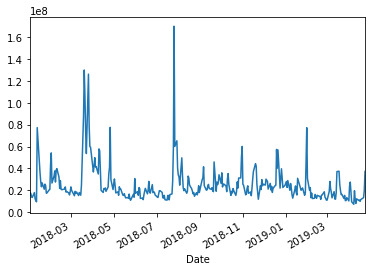

In [3]:
fb['Volume'].plot()

We can [customize our plots with style sheets](https://matplotlib.org/users/style_sheets.html) but a handy reference is within reach. You can substitute 'default' for any one of the styles available and re-run the plotting code to see the styles being applied.

In [4]:
print(plt.style.available)
plt.style.use('default')

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


Because the `.plot()` method is called on a DataFrame object, we can have an indexed DataFrame with multiple columns and `plot` will handle these using its default options:

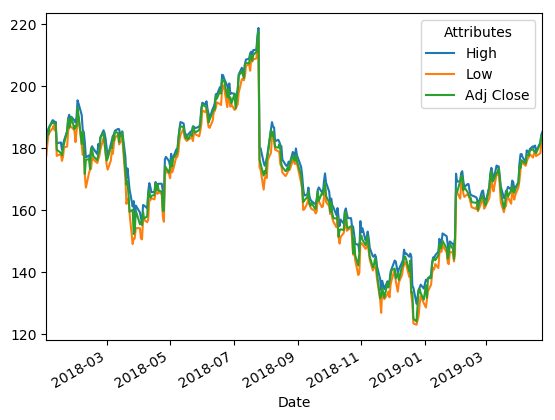

In [5]:
fb.loc[:, ['High', 'Low', 'Adj Close']].plot()

A full reference to [the official documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) on this method would be outside the scope of this coursebook, but is worth a read. 

The docs pointed out, among other things, what parameters are accepted by the method. We will see the following entry under **Parameters**:

- **subplots** : _boolean, default False_
    - Make separate subplots for each columns
    
Try and do that in the following cell. Use `High`, `Low`, and `Adj Close` as columns and pass in the `subplots` logical parameter such that each of the 3 columns are rendered in different plots:

In [6]:
## Your code below


## -- Solution code

Let's try and experiment with one more parameter from the **Parameters** list:

- **kind** : _str_
    - 'box': boxplot
    
Create a boxplot in the following cell:

In [7]:
## Your code below


## -- Solution code

Notice that `pandas` plotting also has convenience functions. The code you wrote above could also be done using these shortcuts:

`fb.loc[:, ['High', 'Low', 'Adj Close']].boxplot()`

Since we're unable to cover the entirety of `matplotlib`, I would recommend the official documentation for anyone wishing to gain a deeper level of familiarity with plotting using `pandas`'s implementation of `matplotlib`.

### Knowledge Check

Consider the following DataFrame. We want a simple plot that compares the closing price of Apple and Facebook stocks over the observed period. 

1. Create a plot with the `Close` price of both Apple and Facebook represented as lines in a single plot.

2. Create two subplots, using the `Close` price of both Apple and Facebook. There should be two separate plots (subplots).

In [8]:
aapl_fb = stock.loc[:,(['Open', 'Close', 'Adj Close'],['AAPL', 'FB'])]
aapl_fb.head()

Attributes        Open                   Close               Adj Close  \
Symbols           AAPL          FB        AAPL          FB        AAPL   
Date                                                                     
2018-01-02  170.160004  177.679993  172.259995  181.419998  168.987320   
2018-01-03  172.529999  181.880005  172.229996  184.669998  168.957886   
2018-01-04  172.539993  184.899994  173.029999  184.330002  169.742706   
2018-01-05  173.440002  185.589996  175.000000  186.850006  171.675278   
2018-01-08  174.350006  187.199997  174.350006  188.279999  171.037628   

Attributes              
Symbols             FB  
Date                    
2018-01-02  181.419998  
2018-01-03  184.669998  
2018-01-04  184.330002  
2018-01-05  186.850006  
2018-01-08  188.279999

## Working with SQL Databases

There are a great number of python modules that provide functionalities to work with databases of all variants and flavors. For a MySQL database, we may form a connection using `pymysql` or one of many other alternatives:

```
import pymysql
conn = pymysql.connect(
    host=host,
    port=port,
    user=user,
    password=password,
    db=database)
```

We can then use `pd.read_sql_query()`, passing in the connection:
```
sales = pd.read_sql_query("SELECT * FROM sales", conn)
```

Under the hood, `pandas` uses SQLAlchemy so any database supported by that library will work. This isn't something you need to worry about at this stage of your learning journey, but for the sake for practice, let's also see how a connection URI for a SQLite database looks like:

In [12]:
import sqlite3
conn = sqlite3.connect("data_input/chinook.db")

albums = pd.read_sql_query("SELECT * FROM albums", conn)
albums.head()

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3


In the above command, we asked for all columns of a table to be returned to us through the `SELECT *` command. Well, columns of which table? That would be `tables`. Together they form an SQL query:

`SELECT * FROM albums`

The database we're working with have a few tables populated with sample data. The database has the following schema:
![](assets/chinookschema.png)

#### Knowledge Check

We'll create a `DataFrame`: this time select all columns from the `artists` table. Recall that when we use `pd.read_sql_query()` command we pass in the SQL query as a string, and add a connection as the second parameter. Save the output as a `DataFrame`.

Your DataFrame should be constructed like this:

`__ = pd.read_sql_query("SELECT __ FROM __ ", conn)`

Question:
1. How many rows are there in your DataFrame?

In [13]:
## Your code below


## -- Solution code

The `pd.read_sql_query` is most commonly used with that two parameters above, but on its [official documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql_query.html) is a list of other parameters we can use as well. 

In the following cell, we use a similar SQL query with an additional `LIMIT` statement to limit the output to the first 5 records (rows). However, notice that we also set `index_col` so the specified column is recognized as the index:

In [19]:
pd.read_sql_query("SELECT * FROM artists LIMIT 5", 
                  conn, 
                  index_col='ArtistId')

,Name
ArtistId,
1,AC/DC
2,Accept
3,Aerosmith
4,Alanis Morissette
5,Alice In Chains


### SQL Joins

`JOIN` statements are used to combine records from two tables. We can have as many `JOIN` operations as we want in a SQL query.

Below is a diagram of the different types of SQL `JOIN` operations:

![](assets/sqljoins.png)

Credit: Data & Object Factory, LLC

In most business scenarios though, a `LEFT JOIN` is almost always the type of `JOIN` you want - it is very direct (and therefore easy to reason about). Left join return all records in the left table regardless if any of those records have a match in the right table.

The `INNER JOIN` is also very intuitive and easily understood. This query return all of the records in the left table that has a matching record in the right table.

> As a personal side note, I've worked at companies where `RIGHT JOIN` is outright forbidden in favor of `LEFT JOIN`: directness and ease-of-understanding aside, all right joins can be replaced by the opposite left join. 
> 
> The `OUTER JOIN` (also referred to as `FULL JOIN`) is also quite uncommon in practice. Performance reason aside, an outer join return all of the records from both tables regardless if there is a match or not, resulting in a DataFrame that has potentially a lot of `NULL` values.

Consider the database schema illustraation again and pay attention to two tables and their respective columns:

1. `albums`: 
    - `AlbumId`, `Title`, `ArtistId`

2. `artists`: `
    - `ArtistId`, `Name`    

We want a `pandas` DataFrame containing the `AlbumId`, `Title` and `Name`. Notice that `Name` is from the `artists` table while the other columns are from the `albums` table. What is a reasonable strategy?

The most straightforward solution is the `LEFT JOIN`, let's see an example:

In [123]:
albums = pd.read_sql_query("SELECT AlbumId, Title, a.Name \
                           FROM albums \
                           LEFT JOIN artists as a \
                           ON a.ArtistId = albums.ArtistId", conn)
albums.head()

,AlbumId,Title,Name
0,1,For Those About To Rock We Salute You,AC/DC
1,2,Balls to the Wall,Accept
2,3,Restless and Wild,Accept
3,4,Let There Be Rock,AC/DC
4,5,Big Ones,Aerosmith


Notice that in the code above, we place a backslash (`\`) character so we have line continuation and the newline will be ignored. This allows SQL to treat the entire query string as if they were essentially one line.

In [35]:
pd.read_sql_query("SELECT * FROM albums", conn).head()

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3


#### Knowledge Check

Consider the database schema illustraation again and pay attention to two tables and their respective columns:

1. `albums`: `AlbumId`, `Title`, `ArtistId`

2. `tracks`: `TrackId`, `Name`, `AlbumId`, `GenreId`, ... `UnitPrice` 
    
3. `genres`: `GenreId`, `Name`

Create a `DataFrame` containing all columns from the `tracks` table; Additionally, it should also contain:
    - The `Title` column from the `albums` table
    - The `Name` column from the `artists` table
    - The `Name` column from the `genres` table 

> **Hint 1**: In your `SELECT` statement, you can use `SELECT tracks.* FROM TRACKS` to select all columns from the `TRACKS` table
> 
> **Hint 2**: When we write `SELECT tracks.Name as tracksName`, we are renaming the output column from `Name` to `tracksName` using a technique called column aliasing. You may optionally consider doing this for columns that share the same name across different tables 

Set the `TrackId`column to be the index. The resulting `DataFrame` should has 11 columns.

Give your `DataFrame` a name: name it `tracks`. Perform EDA on `tracks` to answer the following question:

1. Use `tail()` to inspect the last 5 rows of data. Which genre is present in the last 5 rows of our `tracks` DataFrame (Check all that apply)?
    - [ ] Latin
    - [ ] Classical
    - [ ] Soundtrack
    - [ ] Pop

2. Apply `pd.crosstab(..., columns='count')`, `.value_counts()`, or any other techniques you've learned to compute the frequency table of Genres in your DataFrame. Which is among the top 3 most represented genres in the `tracks` DataFrame?
    - [ ] Latin
    - [ ] Classical
    - [ ] Soundtrack
    - [ ] Pop

3. Use `groupby()` on Artist Name and compute the `mean()` on the `UnitPrice` of each tracks. You will realize that most artists price their tracks at 0.99 (`mean`) but there are several artists where the `mean()` is 1.99. Which of the Artist has a mean of 0.99 `UnitPrice`:
    - [ ] The Office
    - [ ] Aquaman
    - [ ] Pearl Jam
    - [ ] Lost

In [25]:
## Your code below


## -- Solution code

### WHERE statements

We've seen how to use do some of the most common SQL operations this far. In particular, we have:

- Learned how to write `SELECT` statements  
- Use `index_col` in the `pd.read_sql_query()` method  
- SQL Join operations
- Use SQL Aliases

In the following example, we'll look at one more technique in the SQL arsenal: the `WHERE` clause

A `WHERE` clause is followed by a **condition**. If we want to query for all invoices where country of the billing address is Germany, we can add a `Where` clause to our sql query string:

In [98]:
germany = pd.read_sql_query("SELECT * FROM invoices WHERE BillingCountry = 'Germany'", conn)
germany.head()

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,6,37,2009-01-19 00:00:00,Berger Straße 10,Frankfurt,None,Germany,60316,0.99
2,7,38,2009-02-01 00:00:00,Barbarossastraße 19,Berlin,None,Germany,10779,1.98
3,12,2,2009-02-11 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,13.86
4,29,36,2009-05-05 00:00:00,Tauentzienstraße 8,Berlin,None,Germany,10789,1.98


`WHERE` conditions can be combined with `AND`, `OR` and `NOT`. Supposed we want to create a DataFrame containing all invoices where the billing country is **not** Indonesia, we can do the following:

In [105]:
international = pd.read_sql_query("SELECT * FROM invoices WHERE NOT BillingCountry = 'Indonesia'", conn)
international.head()

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86


#### Knowledge Check

Edit the following code to include a `WHERE` clause. We want the returned DataFrame to contain only the `Pop` genre and only when the `UnitPrice` of the track is 0.99:

```
popmusic = pd.read_sql_query("SELECT tracks.*, genres.Name as GenreName \
                            FROM tracks \
                            LEFT JOIN genres ON _____ \
                            WHERE genres.Name = ____ AND _____, 
                           conn,
                           index_col='TrackId'

)
```

Question:
1. How many rows are there in `popmusic`?

In [106]:
## Your code below


## -- Solution code

# Learn-by-Building
## Graded Assignment 4
### SQL and Exploratory Data Analysis

The following learn-by-building exercise will guide you through the process of building out a simple analysis along with some accompanying charts. This module is considerably more difficult than similar exercise blocks in the past, but it sure is a lot more rewarding!

Let's try by first constructing a DataFrame using the `read_sql_query()` method that we've grown familiar to. We want to develop a simple sales visualization report of our top 5 key markets (`Country` column in `customers`) ranked by Sales (`Total` column in `invoices`). 

We also want to identify our top 5 customers by name (`FirstName`, `LastName`) in the report.

Last but not least, we want the report to include a day-of-week analysis on sales performance, and for that we will need the `InvoiceDate` column. 

> **Hint 1**: `pandas` has built-in methods of extracting the name of day in a week. We've seen this in Part 2 of this specialization (**Working with Datetime chapter**). An example usage is:
>
> `x['InvoiceDOW'] = x['InvoiceDate'].dt.weekday_name`
>
>  **Hint 2**: In `read_sql_query`, you can use the `parse_dates='InvoiceDate'` argument to have the specified column parsed as date, saving you from a `to_datetime()` conversion

In [195]:
## Your code below


## -- Solution code

1. Which of the following customers are among the top 5 customers ranked by their respective total (`Total`)? Choose all that apply.
    - [ ] Victor Stevens
    - [ ] Hugh O'Reilly
    - [ ] Puja Srivastava
    - [ ] Ellie Sullivan

2. Which of the following countries are among the top 5 grossing ranked by their respective total (`Total`)? Choose all that apply.
    - [ ] United Kingdom
    - [ ] Germany
    - [ ] Portugal
    - [ ] India
    
3. How many sales transactions (or records, or rows) were from the top 5 countries?
    - Answer:

In [245]:
## Your code below


## -- Solution code

Use the code block below as reference to create a DataFrame containing records where the customers are from one of the top 5 countries. The number of rows in this new DataFrame should be equal to your answer in question (3). Notice that we have additionally converted our day-of-week column into a `Categorical` column:

```
top5 = x.groupby('Country').Total.sum().sort_values(ascending=False).head().index.to_list()
invo_topcountry = invo[invo['Country'].isin(top5)].copy()
# Represents a categorical variable in classic R fashion (pandas documentation) and have it ordered
invo_topcountry['InvoiceDOW'] = pd.Categorical(invo_topcountry.InvoiceDOW, categories=['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
invo_topcountry.shape # same as answer for question (3)
```

4. Using the `pd.pivot_table()` method, answer the next two questions
    - 4.1 How much sales did we make in total (`Total`) from the France market on a Tuesday?
    - 4.2 How much sales did we make in total (`Total`) from all the top 5 markets combined on a Friday?

5. Give the `pivot_table` that you created a name. Remove the margins if they were included in the earlier step. Create a visualization by chaining the `.plot()` method on the pivot table. Set the `kind` parameter to be one of:
    - `line`
    - `bar`
    - `hist`
    - `box`
    
Which are the most appropriate plot type(s)? Choose THREE:
    - [ ] `hist`
    - [ ] `box`
    - [ ] `bar`
    - [ ] `scatter`
    - [ ] `line`

In [257]:
## Your code below


## -- Solution code

### Reference Answer

Reference code for Learn-By-Building:
```
tracks = pd.read_sql_query("SELECT tracks.*, albums.Title, artists.Name as ArtistName, genres.Name as GenreName \
                            FROM tracks \
                            LEFT JOIN albums ON albums.AlbumId = tracks.AlbumId \
                            LEFT JOIN artists ON artists.ArtistId = albums.ArtistId \
                            LEFT JOIN genres ON genres.GenreId=tracks.GenreId", 
                           conn,
                           index_col='TrackId'

)

tracks.shape
```